In [2]:
import numpy as np
import sys,os, json
from plotter_lib import *


In [5]:
db = "/workspaces/football_5/data/"

liga = "England"

arx = db+"events_%s.json"%liga

data = json.load(open(arx, 'r'))

In [36]:
N = len(data)

d = { "no_trans":[],"trans":[] }

eventos_permitidos=[8]

count=0
posesion = []

for i in range(N-1):

    e1 = data[i]
    e2 = data[i+1]

    if e1['teamId'] == e2['teamId']:
        posesion.append(e1)
    
    else:

        traj = []
        pases=0

        for e in posesion:
            if e['eventId']==8:
                pases+=1
            
            traj.append( [ e['eventSec'], e['positions'][0]['x'], e['positions'][0]['y']] )


        if len(traj)>1:

            e = abs(sum(list(map( lambda u: 1 if u[1]>50 else -1, traj ))))
            l = len(traj)
            pe = (l+e)/(2*l) # porcentaje en exceso

            if (pe>=0.7):    # si x=1 la traj esta en uno de los campos, si x=0 esta en los dos (transversal)
                d["no_trans"].append(pases)
            else:
                d["trans"].append( pases )
            
            count+=1

        

        # resetei posesion para proxima
        posesion = []

print (count)


68814


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


4.374314392277315 11.262943803746351 14.76031201020714 0.22860725369110685
5.8049524493091695 22.017402352843902 27.892520489431355 0.17226669963834193


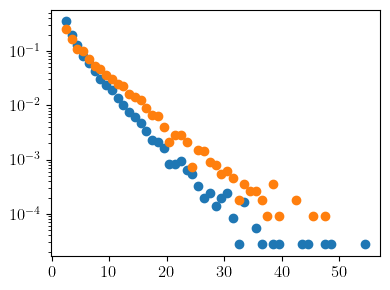

In [37]:
plot = Plotter()

u = np.array(d["no_trans"])
u= u[u>1]
mini,maxi = min(u), max(u) 
pars = [ mini,maxi , 1. ]
x,y = get_dist(u, pars)
plot.ax.scatter(x,y)


mu = np.mean(u)
p = 1.0/mu
var = (1-p)/(p**2)

print (len(u), mu, np.var(u), var, p)


u = np.array(d["trans"])
u= u[u>1]
mini,maxi = min(u), max(u) 
pars = [ mini,maxi , 1. ]
x,y = get_dist(u, pars)
plot.ax.scatter(x,y)


mu = np.mean(u)
p = 1.0/mu
var = (1-p)/(p**2)

print (len(u), mu, np.var(u), var, p)


#plot.ax.set_xscale("log")
plot.ax.set_yscale("log")

plot.show()